**Example of image classification model creation using transfer learning**

In [0]:

​
# This will prompt for authorization.
drive.mount('/content/drive')
​
# Modify to load your dataset
!ls '/content/drive/My Drive/18-19/Trimestre 3/Project/final project collab/dataset/'
base_dir = '/content/drive/My Drive/18-19/Trimestre 3/Project/final project collab/'

##Opening Data And saving

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

# Modify to load your dataset
!ls '/content/drive/My Drive/18-19/Trimestre 3/Project/final project collab/dataset/'
base_dir = '/content/drive/My Drive/18-19/Trimestre 3/Project/final project collab/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Asian_F  Asian_M  Black_F  Black_M  Latino_F  Latino_M	White_F  White_M


In [0]:
#import all needed libraries
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install tf-nightly-gpu-2.0-preview
!pip install tensorflowjs
import tensorflow as tf


import os
import numpy as np
import matplotlib.pyplot as plt

In [0]:


#Resize images

SIZE_IMAGE = 224
SIZE_BATCH = 64

# split dataset for validatino and training

dataset_dir = base_dir + 'dataset/'

datagen_keras = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2)

train_generator = datagen_keras.flow_from_directory(
    dataset_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='training')

val_generator = datagen_keras.flow_from_directory(
    dataset_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='validation')

Found 968 images belonging to 8 classes.
Found 239 images belonging to 8 classes.


In [0]:
#Print shape to check image and batch size
for batch_image, batch_label in train_generator:
  break
batch_image.shape, batch_label.shape

((64, 224, 224, 3), (64, 8))

In [0]:
#Save class labels
print (train_generator.class_indices)

labels_generated = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels_generated.txt', 'w') as f:
  f.write(labels_generated)

{'Asian_F': 0, 'Asian_M': 1, 'Black_F': 2, 'Black_M': 3, 'Latino_F': 4, 'Latino_M': 5, 'White_F': 6, 'White_M': 7}


In [0]:
#Print labels
!cat labels_generated.txt

Asian_F
Asian_M
Black_F
Black_M
Latino_F
Latino_M
White_F
White_M

In [0]:
# Create the base model from the pre-trained model (keras have VGG19, mobilenet, inception,resnet...) sing imagenet weights
SHAPE_IMG = (SIZE_IMAGE, SIZE_IMAGE, 3)


base_model = tf.keras.applications.VGG19(input_shape=SHAPE_IMG,
                                              include_top=False, 
                                              weights='imagenet')

#base_model = tf.keras.applications.InceptionV3(input_shape=SHAPE_IMG,
 #                                             include_top=False, 
  #                                            weights='imagenet')

80142336/80134624 [==============================] - 1s 0us/step


In [0]:
#Freeze all layers except classification layer, we are using the base model as feature extractor
base_model.trainable = False

In [0]:
#Add classification layer
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(8, activation='softmax')
])

In [0]:
#Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [0]:
#Print summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
conv2d (Conv2D)              (None, 5, 5, 32)          147488    
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 8)                 264       
Total params: 20,172,136
Trainable params: 147,752
Non-trainable params: 20,024,384
_________________________________________________________________


In [0]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 4


In [0]:
#Train model
epochs = 10

history = model.fit(train_generator, 
                    epochs=epochs, 
                    validation_data=val_generator)

Epoch 1/10


W0616 08:25:24.145735 140031288887168 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/ops/math_grad.py:1251: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


16/16 [==============================] - 722s 45s/step - loss: 1.7434 - accuracy: 0.3853 - val_loss: 1.5722 - val_accuracy: 0.5105
Epoch 2/10
16/16 [==============================] - 647s 40s/step - loss: 1.4119 - accuracy: 0.5671 - val_loss: 1.3917 - val_accuracy: 0.5816
Epoch 3/10
16/16 [==============================] - 649s 41s/step - loss: 1.2251 - accuracy: 0.6167 - val_loss: 1.1910 - val_accuracy: 0.6360
Epoch 4/10
16/16 [==============================] - 648s 40s/step - loss: 1.0748 - accuracy: 0.6756 - val_loss: 1.1608 - val_accuracy: 0.6444
Epoch 5/10
16/16 [==============================] - 653s 41s/step - loss: 0.9684 - accuracy: 0.7087 - val_loss: 1.0926 - val_accuracy: 0.6611
Epoch 6/10
16/16 [==============================] - 644s 40s/step - loss: 0.8664 - accuracy: 0.7314 - val_loss: 1.0052 - val_accuracy: 0.6987
Epoch 7/10
16/16 [==============================] - 644s 40s/step - loss: 0.8079 - accuracy: 0.7428 - val_loss: 0.9751 - val_accuracy: 0.6946
Epoch 8/10
16/16 

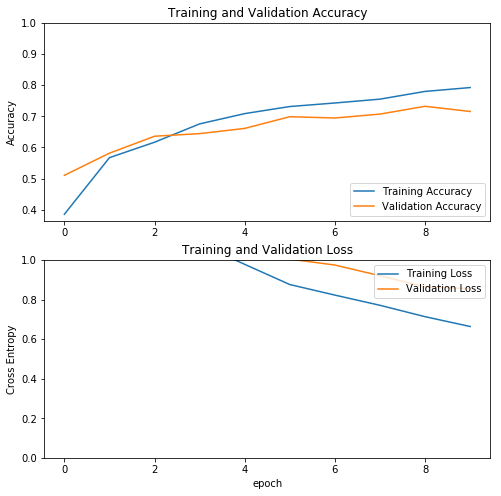

In [0]:
#Learning curves

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [0]:
#download tf js model in zip
model.save('keras_eth_people_vgg19.h5')

In [0]:
#Save model in folder and convert to json model
!rm -rf model_eth_normal_vgg19
!mkdir model_eth_normal_vgg19
!tensorflowjs_converter --input_format keras keras_eth_people_vgg19.h5 model/

In [0]:
!zip -r model_eth_normal_vgg19.zip model 

  adding: model/ (stored 0%)
  adding: model/group1-shard17of20.bin (deflated 7%)
  adding: model/group1-shard9of20.bin (deflated 7%)
  adding: model/group1-shard15of20.bin (deflated 7%)
  adding: model/group1-shard18of20.bin (deflated 7%)
  adding: model/group1-shard14of20.bin (deflated 7%)
  adding: model/group1-shard4of20.bin (deflated 7%)
  adding: model/model.json (deflated 92%)
  adding: model/group1-shard5of20.bin (deflated 7%)
  adding: model/group1-shard12of20.bin (deflated 7%)
  adding: model/group1-shard20of20.bin (deflated 7%)
  adding: model/group1-shard16of20.bin (deflated 7%)
  adding: model/group1-shard13of20.bin (deflated 7%)
  adding: model/group1-shard8of20.bin (deflated 7%)
  adding: model/group1-shard11of20.bin (deflated 7%)
  adding: model/group1-shard19of20.bin (deflated 7%)
  adding: model/group1-shard2of20.bin (deflated 7%)
  adding: model/group1-shard10of20.bin (deflated 7%)
  adding: model/group1-shard3of20.bin (deflated 7%)
  adding: model/group1-shard1of20.

In [0]:
from google.colab import files
files.download('model_eth_normal_vgg19.zip')

In [0]:
# Fine tuning, to improve the performance we can recalculate the weights when training
base_model.trainable = True

In [0]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 10

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  22


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
conv2d (Conv2D)              (None, 5, 5, 32)          147488    
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 8)                 264       
Total params: 20,172,136
Trainable params: 147,752
Non-trainable params: 20,024,384
_________________________________________________________________


In [0]:
#train using fine tuning
history_fine = model.fit(train_generator, 
                         epochs=5,
                         validation_data=val_generator)

Epoch 1/5
16/16 [==============================] - 684s 43s/step - loss: 0.6219 - accuracy: 0.8161 - val_loss: 0.8571 - val_accuracy: 0.7155
Epoch 2/5
16/16 [==============================] - 661s 41s/step - loss: 0.6358 - accuracy: 0.8068 - val_loss: 0.8426 - val_accuracy: 0.7071
Epoch 3/5
16/16 [==============================] - 658s 41s/step - loss: 0.6428 - accuracy: 0.8130 - val_loss: 0.8373 - val_accuracy: 0.7113
Epoch 4/5
16/16 [==============================] - 661s 41s/step - loss: 0.6283 - accuracy: 0.8110 - val_loss: 0.8438 - val_accuracy: 0.7113
Epoch 5/5
16/16 [==============================] - 658s 41s/step - loss: 0.6285 - accuracy: 0.8110 - val_loss: 0.8449 - val_accuracy: 0.7029


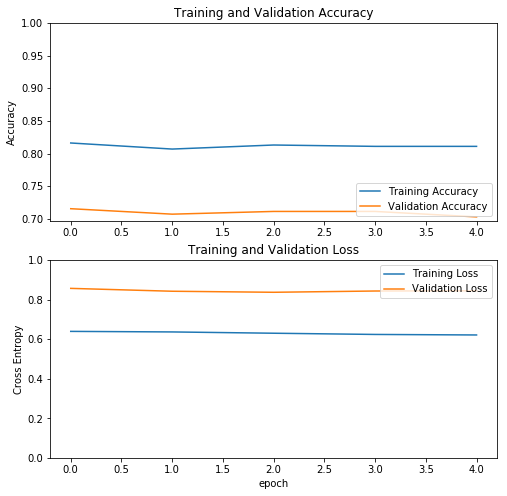

In [0]:
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [0]:
#download tf js model in zip
model.save('keras_eth_people_fine_tuned_vgg19.h5')

In [0]:
!mkdir model_eth_fine_tuned_vgg19
!tensorflowjs_converter --input_format keras keras_eth_people_fine_tuned_vgg19.h5 model/

In [0]:
!zip -r model_eth_fine_tuned_vgg19.zip model 

  adding: model/ (stored 0%)
  adding: model/group1-shard17of20.bin (deflated 7%)
  adding: model/group1-shard9of20.bin (deflated 7%)
  adding: model/group1-shard15of20.bin (deflated 7%)
  adding: model/group1-shard18of20.bin (deflated 7%)
  adding: model/group1-shard14of20.bin (deflated 7%)
  adding: model/group1-shard4of20.bin (deflated 7%)
  adding: model/model.json (deflated 91%)
  adding: model/group1-shard5of20.bin (deflated 7%)
  adding: model/group1-shard12of20.bin (deflated 7%)
  adding: model/group1-shard20of20.bin (deflated 7%)
  adding: model/group1-shard16of20.bin (deflated 7%)
  adding: model/group1-shard13of20.bin (deflated 7%)
  adding: model/group1-shard8of20.bin (deflated 7%)
  adding: model/group1-shard11of20.bin (deflated 7%)
  adding: model/group1-shard19of20.bin (deflated 7%)
  adding: model/group1-shard2of20.bin (deflated 7%)
  adding: model/group1-shard10of20.bin (deflated 7%)
  adding: model/group1-shard3of20.bin (deflated 7%)
  adding: model/group1-shard1of20.

In [0]:
from google.colab import files
files.download('model_eth_fine_tuned_vgg19.zip')